In [18]:
from scipy.special import legendre
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np


### Полиномы Лежандра

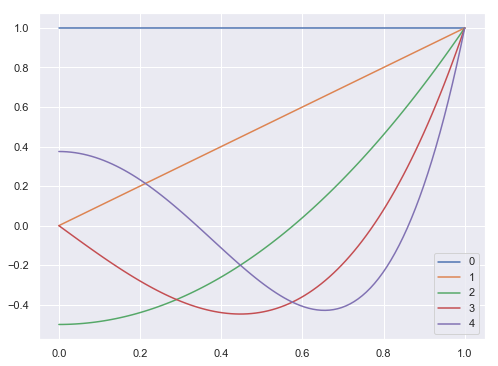

In [17]:
N = 5
lenght = 100
Pn = [0]*N
for i in range(N):
    Pn[i] = legendre(i)
x = np.linspace(0,1, lenght)
#for i in range()
plt.figure(figsize = (8,6))
for i in range(N):
    plt.plot(x, Pn[i](x),label = i)
plt.legend()

[[0.5 0.  1.  0.  0. ]]


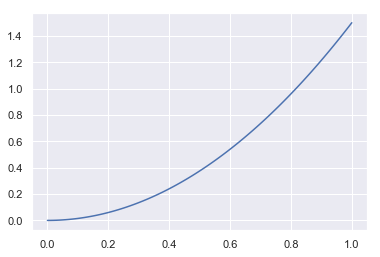

In [19]:
matrix_basis = np.zeros((N, lenght))
for i in range(N):
    matrix_basis[i] = Pn[i](x)

fun_coef = np.zeros((N,1)) #vecrot of cooefficient
fun_coef[0] = 0.5
fun_coef[1] = 0
fun_coef[2] = 1

func = np.dot(matrix_basis.T, fun_coef)
print(fun_coef.T)
plt.plot(x, func)


In [20]:
##теперь нужно придумать матрицу которая при умножении на массив давала бы нам производну

diff_matrix = np.array([[0,1,0,1,0],
                        [0,0,3,0,3],
                        [0,0,0,5,0],
                        [0,0,0,0,7],
                        [0,0,0,0,0]])

coef = [0.5,0,2,0,0]
coef_func = np.array(coef).reshape(-1,1)
coef_diff_func = np.dot(diff_matrix, coef_func)
print(*coef_func, '\n', *coef_diff_func)


[0.5] [0.] [2.] [0.] [0.] 
 [0.] [6.] [0.] [0.] [0.]


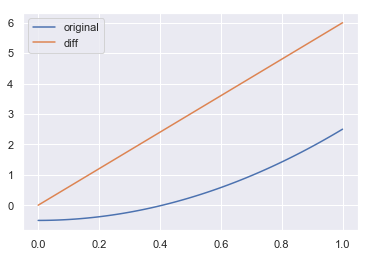

In [21]:
func_value = np.dot(matrix_basis[:coef_func.shape[0]].T, coef_func)
diff_func_value = np.dot(matrix_basis[:coef_func.shape[0]].T, coef_diff_func)
plt.plot(x, func_value, label='original')
plt.plot(x, diff_func_value, label='diff')
plt.legend()

### Полиномы Чебышего первого рода

$T_0(x) = 1$  
$T_1(x) = x$  
$T_2(x) = 2x^2 - 1$  
$T_3(x) = 4x^3 - 3x$  
...

$T_{n+1}(x) = 2xT_n(x) - T_{n-1}(x)$



In [22]:
from scipy.special import chebyt
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

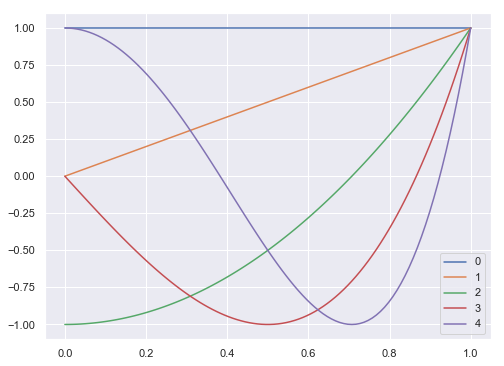

In [30]:
N = 5
lenght = 100
Pn = [0]*N
for i in range(N):
    Pn[i] = chebyt(i)
x = np.linspace(0,1, lenght)
#for i in range()
plt.figure(figsize = (8,6))
for i in range(N):
    plt.plot(x, Pn[i](x),label = i)
plt.legend()

In [32]:
matrix_basis = np.zeros((N, lenght))
for i in range(N):
    matrix_basis[i] = Pn[i](x)

In [33]:
##теперь нужно придумать матрицу которая при умножении на массив давала бы нам производну
diff_matrix = np.array([[0,1,0,3,0],
                        [0,0,4,0,8],
                        [0,0,0,6,0],
                        [0,0,0,0,8],
                        [0,0,0,0,0]])

coef = [0.5, 0, 2, 0, 0]
coef_func = np.array(coef).reshape(-1,1)
coef_diff_func = np.dot(diff_matrix, coef_func)
print(*coef_func, '\n', *coef_diff_func)

[0.5] [0.] [2.] [0.] [0.] 
 [0.] [8.] [0.] [0.] [0.]


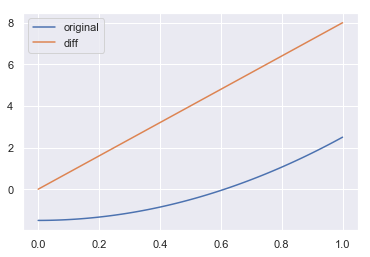

In [34]:
func_value = np.dot(matrix_basis[:coef_func.shape[0]].T, coef_func)
diff_func_value = np.dot(matrix_basis[:coef_func.shape[0]].T, coef_diff_func)
plt.plot(x, func_value, label='original')
plt.plot(x, diff_func_value, label='diff')
plt.legend()

### Полиномы Чебышего второго рода

$U_0(x) = 1$  
$U_1(x) = 2x$  
$U_2(x) = 4x^2 - 1$  
$U_3(x) = 8x^3 - 4x$  
...

$U_{n+1}(x) = 2xU_n(x) - U_{n-1}(x)$


In [27]:
from scipy.special import chebyu

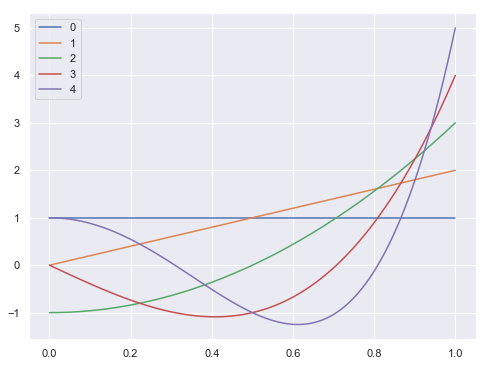

In [29]:
N = 5
lenght = 100
Pn = [0]*N
for i in range(N):
    Pn[i] = chebyu(i)
x = np.linspace(0,1, lenght)
#for i in range()
plt.figure(figsize = (8,6))
for i in range(N):
    plt.plot(x, Pn[i](x),label = i)
plt.legend()

In [ ]:
for  i in range(10):
    mas = [0,1] + [0]*(10-2)
    mas[i+1]

In [90]:
N = 10
Mas = np.zeros((N, N))
Mas[0,0] = 1
Mas[1,1] = 1

for i in range(2, N):
    mas=np.zeros(N)
    mas[1:] = Mas[:N-1,i-1]
    Mas[:,i] = 2*mas - Mas[:,i-2]
print(Mas)

zer = np.zeros((N,N))
for i in range(N-1):
    zer[i,i+1] = i+1
print(zer.shape, Mas.shape)
print(np.dot(Mas, zer).roun)

[[   1.    0.   -1.    0.    1.    0.   -1.    0.    1.    0.]
 [   0.    1.    0.   -3.    0.    5.    0.   -7.    0.    9.]
 [   0.    0.    2.    0.   -8.    0.   18.    0.  -32.    0.]
 [   0.    0.    0.    4.    0.  -20.    0.   56.    0. -120.]
 [   0.    0.    0.    0.    8.    0.  -48.    0.  160.    0.]
 [   0.    0.    0.    0.    0.   16.    0. -112.    0.  432.]
 [   0.    0.    0.    0.    0.    0.   32.    0. -256.    0.]
 [   0.    0.    0.    0.    0.    0.    0.   64.    0. -576.]
 [   0.    0.    0.    0.    0.    0.    0.    0.  128.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.  256.]]
(10, 10) (10, 10)
[[ 0.000e+00  1.000e+00  0.000e+00 -3.000e+00  0.000e+00  5.000e+00
   0.000e+00 -7.000e+00  0.000e+00  9.000e+00]
 [ 0.000e+00  0.000e+00  2.000e+00  0.000e+00 -1.200e+01  0.000e+00
   3.000e+01  0.000e+00 -5.600e+01  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00  6.000e+00  0.000e+00 -4.000e+01
   0.000e+00  1.260e+02  0.000e+00 -2.880e+02]
 [ 0.0